## Problem Statement 

The Titan Insurance Company has just installed a new incentive payment scheme for its lift policy sales force. It wants to have an early view of the success or failure of the new scheme. Indications are that the sales force is selling more policies but sales always vary in an unpredictable pattern from month to month and it is not clear that the scheme has made a significant difference.

Life Insurance companies typically measure the monthly output of a salesperson as the total sum assured for the policies sold by that person during a month. For example, suppose salesperson X has, in a month, sold seven policies for which the sums assured are £1000, £2500, £3000,£5000, £10000, £35000. X's output for that month is the total of these sums assured, £61,500. Titan's new scheme is that the sales force receive low regular salaries but are paid large bonuses related to their output (i.e. to the total sum assured of policies sold by them). The scheme is expensive for the company but they are looking for the sales to increase more than compensate. The agreement with the sales force is that if the scheme does not at least break even for the company, it will be abandoned after six months.

The scheme has now been in operation for four months. It has settled down after fluctuations in the first two months due to the changeover. To test the effectiveness of the scheme, Titan has taken a random sample of 30 salespeople, measured their output in the penultimate month before the changeover, and then measured it in the fourth month after the changeover (they have deliberately chosen months not too close to the changeover).

You, as a data analyst in the company, are assigned this work. Primarily, you want to answer the following questions:

i) Conduct a hypothesis test to determine whether the new scheme has significantly raised outputs. Use level of significance as 5%

ii) What conclusion does the test lead to?

iii) What observations do you have about this result?

## Data Dictionary

The provided dataset contains the following columns:
1. `Salesperson`: Index of the salesperson.
2. `Old Scheme`: Monthly output of the salesperson before the changeover.
3. `New Scheme`: Monthly output of the salesperson after the changeover

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy import stats

### Reading the data into a dataframe 

In [2]:
df = pd.read_csv('TitanInsurance.csv') 
# first five rows of the dataset
df.head()

,Salesperson,Old Scheme,New Scheme
0,1,57,62
1,2,103,122
2,3,59,54
3,4,75,82
4,5,84,84


In [3]:
# shape of the dataset
df.shape

(30, 3)

* The dataset contains 30 rows and 3 columns

In [4]:
# information about the columns in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Salesperson  30 non-null     int64
 1   Old Scheme   30 non-null     int64
 2   New Scheme   30 non-null     int64
dtypes: int64(3)
memory usage: 848.0 bytes


* The three columns in the data are `Salesperson`, `Old Scheme`, and `New Scheme`
* All the columns are of interger type (numerical)

In [5]:
# summary of the data
df.describe()

,Salesperson,Old Scheme,New Scheme
count,30.000000,30.000000,30.000000
mean,15.500000,68.033333,72.033333
std,8.803408,20.455980,24.062395
min,1.000000,28.000000,32.000000
25%,8.250000,54.000000,55.000000
50%,15.500000,67.000000,74.000000
75%,22.750000,81.500000,85.750000
max,30.000000,110.000000,122.000000


* The data contains information about 30 Sales persons
* The average output for the Old Scheme is 68.03, and for the New Scheme is 72.03

In [6]:
# check for missing values
df.isnull().sum()

Salesperson    0
Old Scheme     0
New Scheme     0
dtype: int64

There are no missing values in the dataset.

<AxesSubplot:>

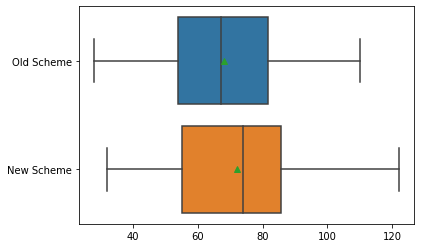

In [7]:
# visual analysis of outputs from old scheme and new scheme
sns.boxplot(data=df[["Old Scheme","New Scheme"]],orient="h",showmeans=True)

* Mean and median of the outputs for new scheme is slightly higher as compared to old scheme

## Let's conduct a hypothesis test to determine whether the new scheme has significantly raised outputs. Use level of significance as 5%

## Step 1: Define null and alternate hypothesis

$H_0:$ The mean output from the new scheme is equal to the mean output from the old scheme.

$H_a:$ The mean output from the new scheme is greater than the mean output from the old scheme.

Let $\mu_1$ and $\mu_2$ be the mean output from the new scheme and the mean output from the old scheme respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: \mu_1 = \mu_2 $

$H_a: \mu_1 > \mu_2 $

## Step 2: Select Appropriate test

This is a case of a one-tailed two-sample mean test. As the two samples are not independent in this case, and also the population standard deviations are unknown, we shall use a paired t-test for this problem.

## Step 3: Decide the significance level

As given in the problem statement, we select $\alpha$ = 0.05.

## Step 4: Calculate the p-value

* **scipy.stats.ttest_rel** calculates the t-test on TWO RELATED samples of observations.
* This function returns the test statistic and p-value for a right-tailed t-test in case the alternative parameter is set to 'greater'.

In [8]:
# find the p-value
test_stat, p_value  = stats.ttest_rel(df['New Scheme'], df['Old Scheme'], alternative = 'greater')  #Performing a paired t-test

print('The p-value is', p_value)

The p-value is 0.06528776980668831


## Step 5: Compare the p-value with $\alpha$

In [9]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.06528776980668831 is greater than the level of significance, we fail to reject the null hypothesis.


## Step 6: Draw Inference

At 5% significance level, we fail to reject the null hypothesis. Hence we do not have enough statistical evidence to say that the new scheme raised the output.

## What conclusion does the test lead to?

* In this scenario, the p value is 0.065 which is greater than the 0.05. Hence, we fail to reject the null hypothesis. 

* **This means that the new scheme did not raise the output significantly.**

## What observations do you have about this result?

- If we compare the means of the two sample distributions, we see that even though visually it seems as if New scheme has done better, statistically it does not hold.
- The higher mean in the case of the New scheme can also be attributed to the higher variance compared to Old Scheme.
- The variance of the second data set, 579.00, is 38% more than the variance of the first data set, 418.45. (Squaring of the standard deviation values gives us the values of the variance)
- We are unsure of the sampling error present in the data.
- Unpredictable pattern persists even after the bonus scheme directs the management to work on the lift (product portfolio) and to correct the bonus scheme in proportion to revenue generation rather than policy sale.
- The scheme is expensive for the company but they are looking to compensate it by an increase in sales. The agreement with the sales force is that if the scheme does not at least break even for the company, it will be abandoned after six months. So, it's better for the management to wait for another two months.
- There can be a dip in the New Scheme towards end of the cycle, which suggests that the Sales team may have booked all their sales at the earlier part of the period to get their incentives early or may be waiting till the end of quarter (measurement period) to book all their sales at once. Hence aggregation of data for a quarter may provide more clarity on the performance than for a single month.